In [53]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
#import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import graphviz

In [51]:
!brew install graphviz

zsh:1: command not found: brew


In [42]:
from ImagesProcessingFunctions1 import *

In [44]:
import os
mypath = '/Users/jenifervivar/Desktop/Desktop - jenifer’s MacBook Air/Machine_learning_code/crop_test/'
 
#mypath = '/Users/jenifervivar/Desktop/crop_part1/'#'./Data/CroppedImages'
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
filedf = pd.DataFrame(data = splitcolumns, columns = filecolumns)
filedfnona = filedf.dropna()
filedfnona['age']  = filedfnona['age'].astype(int)
filedfnona['race'] = filedfnona['race'].astype(int)
filedfnona['gender'] = filedfnona['gender'].astype(int)

path = '/Users/jenifervivar/Desktop/UTKface_inthewild/part3'
listing = os.listdir(mypath) 
images = []
for img in filedfnona['file']:
    image = plt.imread(mypath + img)
    images.append(image)

In [55]:
def confusion_plot():
    cf_matrix = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cf_matrix, annot=True, fmt = 'd', cmap='Blues')

    ax.set_title('Confusion Matrix for Least Squares Classifier\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['-1','1'])
    ax.yaxis.set_ticklabels(['-1','1'])

## Display the visualization of the Confusion Matrix.
    plt.show()


In [56]:
scores = []

              precision    recall  f1-score   support

           0       0.41      0.64      0.50        14
           1       0.78      0.58      0.67        31

    accuracy                           0.60        45
   macro avg       0.60      0.61      0.58        45
weighted avg       0.67      0.60      0.61        45

[[ 9  5]
 [13 18]]


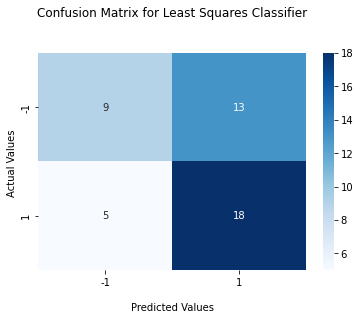

[Text(547.2692307692308, 504.7714285714286, 'X[94067] <= 174.5\ngini = 0.491\nsamples = 87\nvalue = [57, 75]'),
 Text(482.8846153846154, 427.11428571428576, 'X[85517] <= 121.5\ngini = 0.46\nsamples = 79\nvalue = [42, 75]'),
 Text(321.9230769230769, 349.4571428571429, 'X[77656] <= 174.5\ngini = 0.494\nsamples = 46\nvalue = [36, 29]'),
 Text(257.53846153846155, 271.8, 'X[87257] <= 75.0\ngini = 0.491\nsamples = 38\nvalue = [22, 29]'),
 Text(128.76923076923077, 194.14285714285717, 'X[54559] <= 58.5\ngini = 0.393\nsamples = 20\nvalue = [19, 7]'),
 Text(64.38461538461539, 116.48571428571432, 'gini = 0.0\nsamples = 4\nvalue = [0, 5]'),
 Text(193.15384615384616, 116.48571428571432, 'X[96174] <= 210.5\ngini = 0.172\nsamples = 16\nvalue = [19, 2]'),
 Text(128.76923076923077, 38.82857142857142, 'gini = 0.0\nsamples = 15\nvalue = [19, 0]'),
 Text(257.53846153846155, 38.82857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(386.3076923076923, 194.14285714285717, 'X[5290] <= 28.0\ngini = 

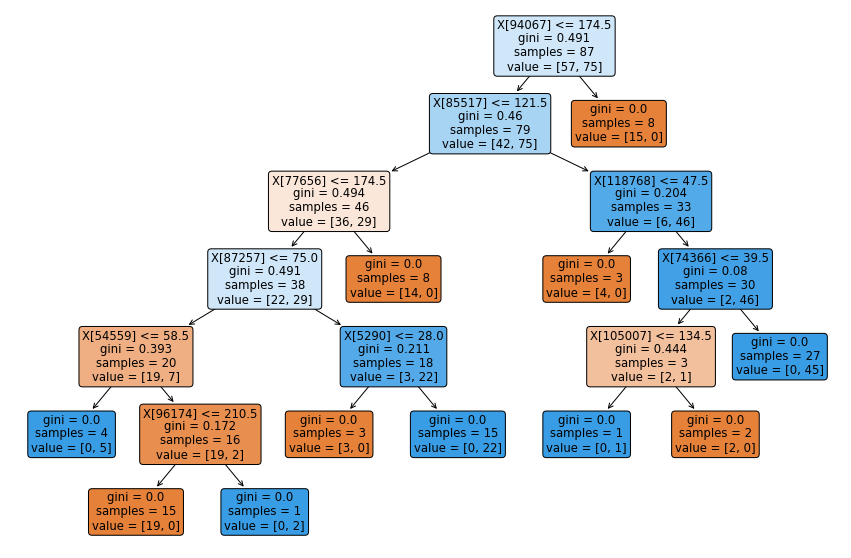

In [57]:
model=RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(np.array(images), filedfnona['gender'])

nsamples, nx, ny, rgb= X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny*rgb))

model.fit(X_train2,y_train)

nsamples, nx, ny, rgb = X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny*rgb))

y_pred=model.predict(x_test2)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
confusion_plot()
score = accuracy_score(y_pred,y_test)
scores.append(score)

fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], 
          #feature_names=y_train[0],
          #class_names=y_test, 
          filled=True, impurity=True, 
          rounded=True)

In [58]:
X_train2.shape

(132, 120000)

In [59]:
y_train.shape

(132,)

In [7]:
print(len(model.estimators_))

100


In [11]:
model.estimators_[1]

DecisionTreeClassifier(max_features='auto', random_state=469585164)

[Text(553.0178571428571, 498.3, 'X[90631] <= 186.5\ngini = 0.497\nsamples = 87\nvalue = [61, 71]'),
 Text(388.60714285714283, 407.70000000000005, 'X[71093] <= 141.5\ngini = 0.431\nsamples = 68\nvalue = [32, 70]'),
 Text(239.14285714285714, 317.1, 'X[64738] <= 169.0\ngini = 0.299\nsamples = 55\nvalue = [15, 67]'),
 Text(119.57142857142857, 226.5, 'X[110346] <= 30.5\ngini = 0.112\nsamples = 46\nvalue = [4, 63]'),
 Text(59.785714285714285, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]'),
 Text(179.35714285714286, 135.89999999999998, 'X[47989] <= 233.0\ngini = 0.031\nsamples = 44\nvalue = [1, 63]'),
 Text(119.57142857142857, 45.299999999999955, 'gini = 0.0\nsamples = 43\nvalue = [0, 63]'),
 Text(239.14285714285714, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(358.7142857142857, 226.5, 'X[112135] <= 112.0\ngini = 0.391\nsamples = 9\nvalue = [11, 4]'),
 Text(298.92857142857144, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 4]'),
 Text(418.5

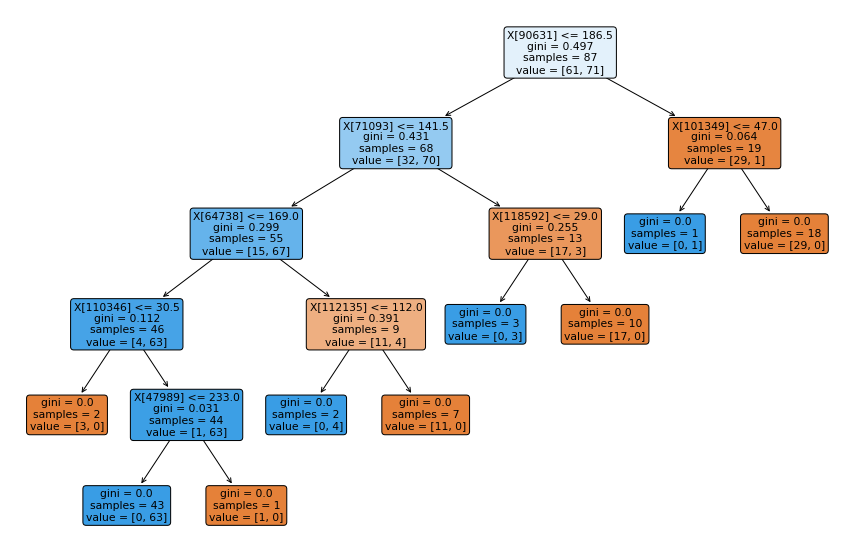

In [13]:
fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[1], 
          #feature_names=X_test,
          #class_names=y_test, 
          filled=True, impurity=True, 
          rounded=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini',
   ...                                     max_depth=4,
   ...                                     random_state=1)
   >>> tree_model.fit(X_train, y_train)
   >>> X_combined = np.vstack((X_train, X_test))
  [ 96 ]
 
Chapter 3
    >>> y_combined = np.hstack((y_train, y_test))
   >>> plot_decision_regions(X_combined,
   ...                       y_combined,
   ...                       classifier=tree_model,
   ...                       test_idx=range(105, 150))
   >>> plt.xlabel('petal length [cm]')
   >>> plt.ylabel('petal width [cm]')
   >>> plt.legend(loc='upper left')
   >>> plt.tight_layout()
   >>> plt.show()

In [15]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
                       
plot_decision_regions(X_combined, y_combined,classifier=tree_model, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

NameError: name 'plot_decision_regions' is not defined

In [8]:
fig.savefig('figure_name.png')

In [9]:
robers, sobel_ = robertsSobelEdges(images)

              precision    recall  f1-score   support

           0       0.32      0.86      0.46         7
           1       0.96      0.66      0.78        38

    accuracy                           0.69        45
   macro avg       0.64      0.76      0.62        45
weighted avg       0.86      0.69      0.73        45

[[ 6  1]
 [13 25]]


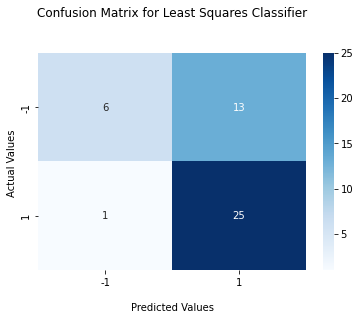

[Text(363.4342105263158, 489.24, 'X[8891] <= 0.008\ngini = 0.496\nsamples = 86\nvalue = [60, 72]'),
 Text(176.21052631578948, 380.52000000000004, 'X[16535] <= 0.007\ngini = 0.366\nsamples = 34\nvalue = [41, 13]'),
 Text(88.10526315789474, 271.8, 'X[25980] <= 0.006\ngini = 0.426\nsamples = 11\nvalue = [4, 9]'),
 Text(44.05263157894737, 163.08000000000004, 'gini = 0.0\nsamples = 3\nvalue = [4, 0]'),
 Text(132.1578947368421, 163.08000000000004, 'gini = 0.0\nsamples = 8\nvalue = [0, 9]'),
 Text(264.3157894736842, 271.8, 'X[24221] <= 0.005\ngini = 0.176\nsamples = 23\nvalue = [37, 4]'),
 Text(220.26315789473685, 163.08000000000004, 'X[4784] <= 0.011\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(176.21052631578948, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(264.3157894736842, 54.360000000000014, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(308.36842105263156, 163.08000000000004, 'gini = 0.0\nsamples = 16\nvalue = [34, 0]'),
 Text(550.6578947368421, 380.52

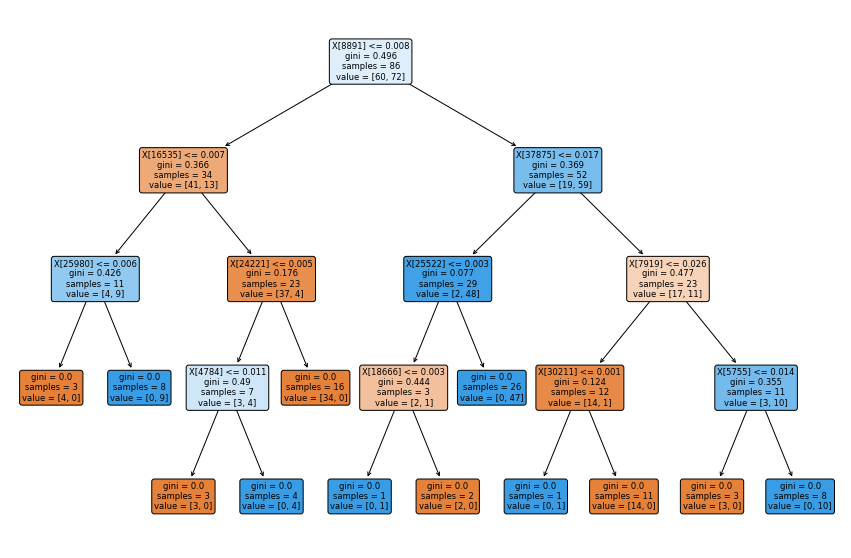

In [10]:
model=RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(robers,filedfnona['gender'])


nsamples, nx, ny= X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny))



model.fit(X_train2,y_train)

nsamples, nx, ny = X_test.shape
X_test2 = X_test.reshape((nsamples,nx*ny))

y_pred=model.predict(X_test2)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
confusion_plot()
score = accuracy_score(y_pred,y_test)
scores.append(score)
fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], 
          #feature_names=X_test,
          #class_names=y_test, 
          filled=True, impurity=True, 
          rounded=True)


              precision    recall  f1-score   support

           0       0.53      0.64      0.58        14
           1       0.82      0.74      0.78        31

    accuracy                           0.71        45
   macro avg       0.68      0.69      0.68        45
weighted avg       0.73      0.71      0.72        45

[[ 9  5]
 [ 8 23]]


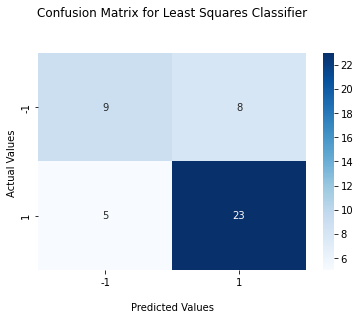

[Text(418.5, 498.3, 'X[10081] <= 0.026\ngini = 0.5\nsamples = 88\nvalue = [66, 66]'),
 Text(257.53846153846155, 407.70000000000005, 'X[28519] <= 0.044\ngini = 0.436\nsamples = 58\nvalue = [57, 27]'),
 Text(128.76923076923077, 317.1, 'X[14443] <= 0.014\ngini = 0.471\nsamples = 21\nvalue = [11, 18]'),
 Text(64.38461538461539, 226.5, 'gini = 0.0\nsamples = 7\nvalue = [9, 0]'),
 Text(193.15384615384616, 226.5, 'X[29240] <= 0.029\ngini = 0.18\nsamples = 14\nvalue = [2, 18]'),
 Text(128.76923076923077, 135.89999999999998, 'gini = 0.0\nsamples = 12\nvalue = [0, 18]'),
 Text(257.53846153846155, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(386.3076923076923, 317.1, 'X[5406] <= 0.003\ngini = 0.274\nsamples = 37\nvalue = [46, 9]'),
 Text(321.9230769230769, 226.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(450.69230769230774, 226.5, 'X[26682] <= 0.071\ngini = 0.177\nsamples = 33\nvalue = [46, 5]'),
 Text(386.3076923076923, 135.89999999999998, 'gini = 0.0\nsamples = 

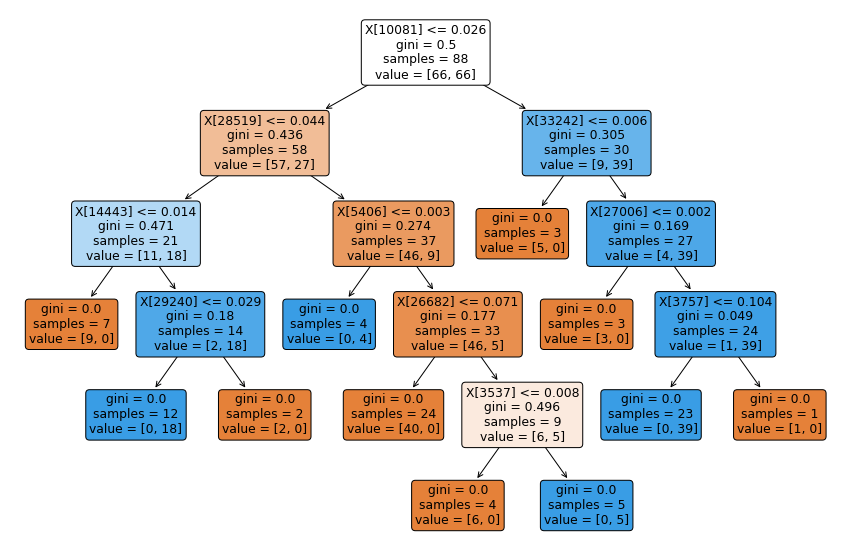

In [11]:
model=RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(sobe, filedfnona['gender'])

nsamples, nx, ny= X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny))

model.fit(X_train2,y_train)

nsamples, nx, ny = X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny))

y_pred=model.predict(x_test2)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
confusion_plot()
score = accuracy_score(y_pred,y_test)
scores.append(score)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], 
          #feature_names=X_test,
          #class_names=y_test, 
          filled=True, impurity=True, 
          rounded=True)

In [12]:
intensity, hist, adapthist = histogramEqualizer(images)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.64      0.78        45

    accuracy                           0.64        45
   macro avg       0.50      0.32      0.39        45
weighted avg       1.00      0.64      0.78        45

[[ 0  0]
 [16 29]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


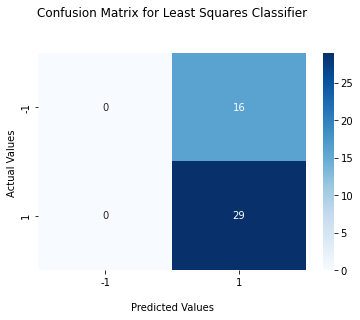

[Text(502.20000000000005, 453.0, 'X[15607] <= 0.001\ngini = 0.481\nsamples = 86\nvalue = [53, 79]'),
 Text(334.8, 271.8, 'X[8928] <= 0.001\ngini = 0.473\nsamples = 83\nvalue = [49, 79]'),
 Text(167.4, 90.59999999999997, 'gini = 0.479\nsamples = 80\nvalue = [49, 74]'),
 Text(502.20000000000005, 90.59999999999997, 'gini = 0.0\nsamples = 3\nvalue = [0, 5]'),
 Text(669.6, 271.8, 'gini = 0.0\nsamples = 3\nvalue = [4, 0]')]

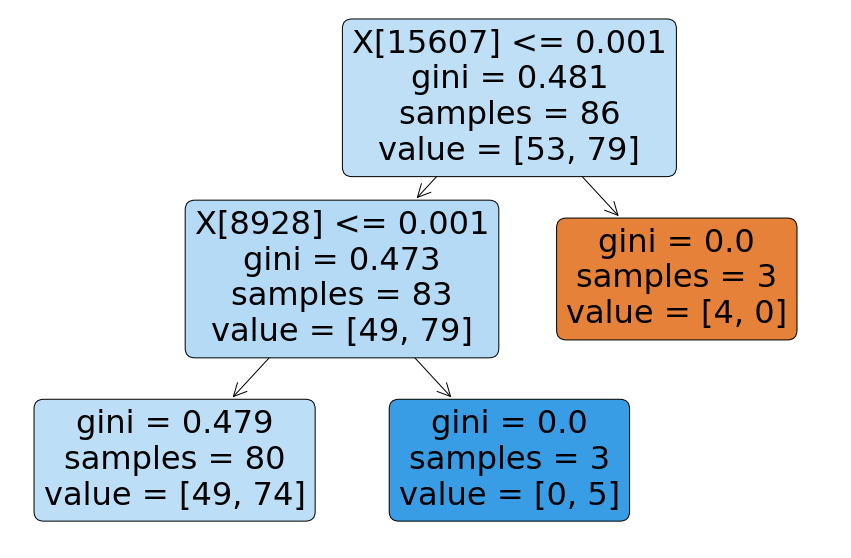

In [13]:
model=RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(intensity, filedfnona['gender'])

nsamples, nx, ny= X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny))

model.fit(X_train2,y_train)

nsamples, nx, ny= X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny))

y_pred=model.predict(x_test2)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
confusion_plot()
score = accuracy_score(y_pred,y_test)
scores.append(score)


fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], 
          #feature_names=X_test,
          #class_names=y_test, 
          filled=True, impurity=True, 
          rounded=True)

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        17
           1       0.75      0.75      0.75        28

    accuracy                           0.69        45
   macro avg       0.67      0.67      0.67        45
weighted avg       0.69      0.69      0.69        45

[[10  7]
 [ 7 21]]


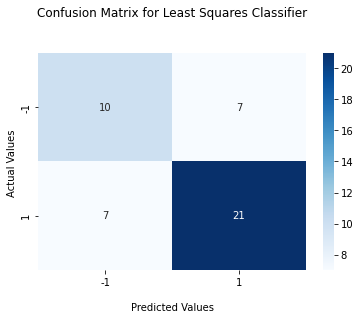

[Text(418.5, 498.3, 'X[28891] <= 0.422\ngini = 0.497\nsamples = 87\nvalue = [61, 71]'),
 Text(186.0, 407.70000000000005, 'X[6058] <= 0.164\ngini = 0.382\nsamples = 40\nvalue = [49, 17]'),
 Text(93.0, 317.1, 'X[18746] <= 0.795\ngini = 0.337\nsamples = 8\nvalue = [3, 11]'),
 Text(46.5, 226.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(139.5, 226.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 11]'),
 Text(279.0, 317.1, 'X[13420] <= 0.165\ngini = 0.204\nsamples = 32\nvalue = [46, 6]'),
 Text(232.5, 226.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 4]'),
 Text(325.5, 226.5, 'X[25233] <= 0.894\ngini = 0.08\nsamples = 30\nvalue = [46, 2]'),
 Text(279.0, 135.89999999999998, 'gini = 0.0\nsamples = 28\nvalue = [46, 0]'),
 Text(372.0, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(651.0, 407.70000000000005, 'X[16602] <= 0.719\ngini = 0.298\nsamples = 47\nvalue = [12, 54]'),
 Text(558.0, 317.1, 'X[20958] <= 0.983\ngini = 0.137\nsamples = 37\nvalue = [4, 50]'),
 Text(511.5, 226.5

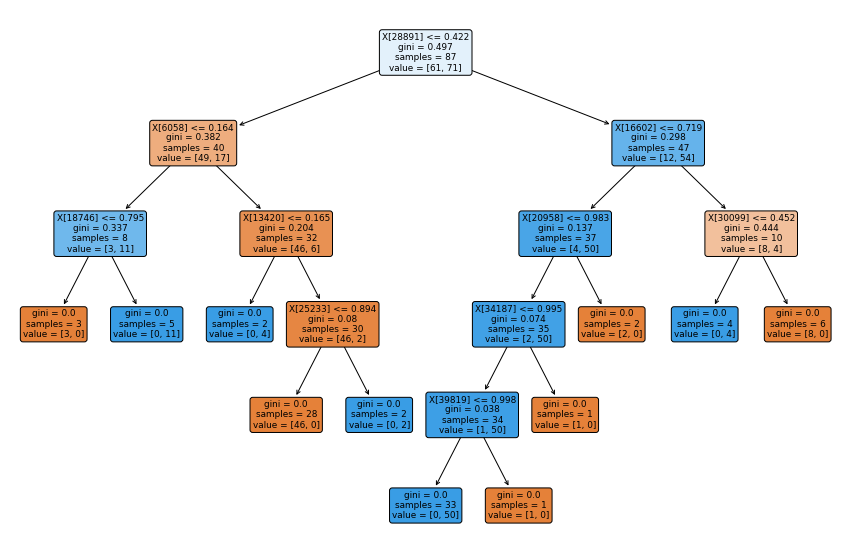

In [14]:
model=RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(hist, filedfnona['gender'])

nsamples, nx, ny= X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny))

model.fit(X_train2,y_train)

nsamples, nx, ny = X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny))

y_pred=model.predict(x_test2)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
confusion_plot()
score = accuracy_score(y_pred,y_test)
scores.append(score)


fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], 
          #feature_names=X_test,
          #class_names=y_test, 
          filled=True, impurity=True, 
          rounded=True)

              precision    recall  f1-score   support

           0       0.60      0.75      0.67        16
           1       0.84      0.72      0.78        29

    accuracy                           0.73        45
   macro avg       0.72      0.74      0.72        45
weighted avg       0.75      0.73      0.74        45

[[12  4]
 [ 8 21]]


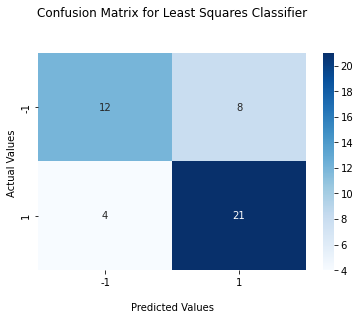

[Text(563.8125, 498.3, 'X[20960] <= 0.779\ngini = 0.444\nsamples = 86\nvalue = [44, 88]'),
 Text(430.125, 407.70000000000005, 'X[23199] <= 0.984\ngini = 0.331\nsamples = 66\nvalue = [22, 83]'),
 Text(302.25, 317.1, 'X[25143] <= 0.74\ngini = 0.236\nsamples = 59\nvalue = [13, 82]'),
 Text(186.0, 226.5, 'X[31730] <= 0.868\ngini = 0.111\nsamples = 51\nvalue = [5, 80]'),
 Text(93.0, 135.89999999999998, 'X[2065] <= 0.141\ngini = 0.025\nsamples = 44\nvalue = [1, 77]'),
 Text(46.5, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(139.5, 45.299999999999955, 'gini = 0.0\nsamples = 43\nvalue = [0, 77]'),
 Text(279.0, 135.89999999999998, 'X[33427] <= 0.501\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(232.5, 45.299999999999955, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(325.5, 45.299999999999955, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(418.5, 226.5, 'X[21458] <= 0.537\ngini = 0.32\nsamples = 8\nvalue = [8, 2]'),
 Text(372.0, 135.89999999999998, 'gini = 0.

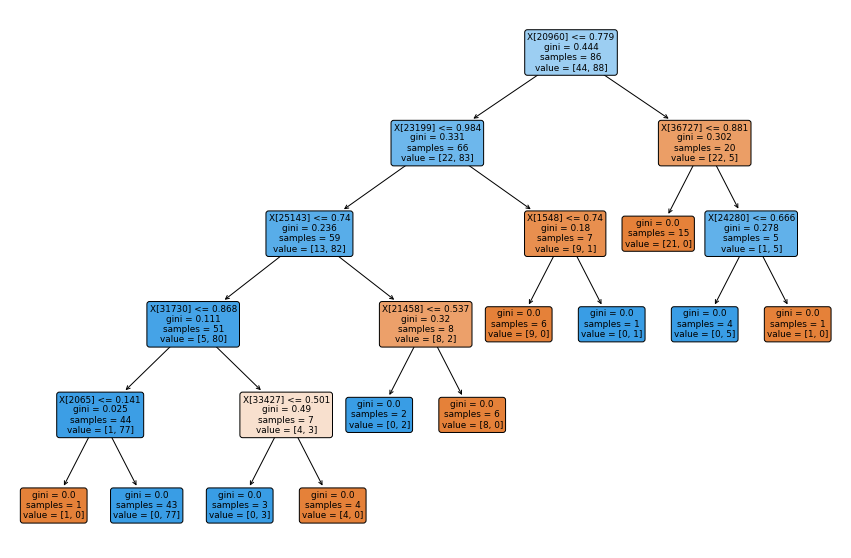

In [15]:
model=RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(adapthist, filedfnona['gender'])

nsamples, nx, ny= X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny))

model.fit(X_train2,y_train)

nsamples, nx, ny = X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny))

y_pred=model.predict(x_test2)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
confusion_plot()
score = accuracy_score(y_pred,y_test)
scores.append(score)
fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], 
          #feature_names=X_test,
          #class_names=y_test, 
          filled=True, impurity=True, 
          rounded=True)

In [16]:
#funtions

              precision    recall  f1-score   support

           0       0.69      0.58      0.63        19
           1       0.72      0.81      0.76        26

    accuracy                           0.71        45
   macro avg       0.71      0.69      0.70        45
weighted avg       0.71      0.71      0.71        45

[[11  8]
 [ 5 21]]


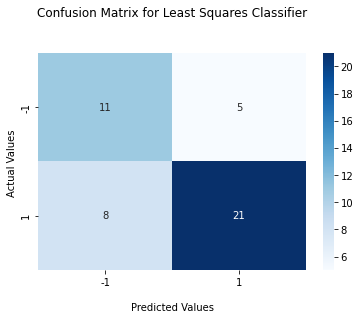

[Text(456.54545454545456, 504.7714285714286, 'X[61739] <= 79.0\ngini = 0.478\nsamples = 88\nvalue = [52, 80]'),
 Text(228.27272727272728, 427.11428571428576, 'X[41795] <= 8.5\ngini = 0.375\nsamples = 65\nvalue = [25, 75]'),
 Text(152.1818181818182, 349.4571428571429, 'gini = 0.0\nsamples = 4\nvalue = [7, 0]'),
 Text(304.3636363636364, 349.4571428571429, 'X[3192] <= 18.0\ngini = 0.312\nsamples = 61\nvalue = [18, 75]'),
 Text(228.27272727272728, 271.8, 'gini = 0.0\nsamples = 5\nvalue = [6, 0]'),
 Text(380.4545454545455, 271.8, 'X[70505] <= 81.0\ngini = 0.238\nsamples = 56\nvalue = [12, 75]'),
 Text(152.1818181818182, 194.14285714285717, 'X[87001] <= 154.0\ngini = 0.109\nsamples = 44\nvalue = [4, 65]'),
 Text(76.0909090909091, 116.48571428571432, 'gini = 0.0\nsamples = 39\nvalue = [0, 62]'),
 Text(228.27272727272728, 116.48571428571432, 'X[8361] <= 80.5\ngini = 0.49\nsamples = 5\nvalue = [4, 3]'),
 Text(152.1818181818182, 38.82857142857142, 'gini = 0.0\nsamples = 3\nvalue = [4, 0]'),
 Tex

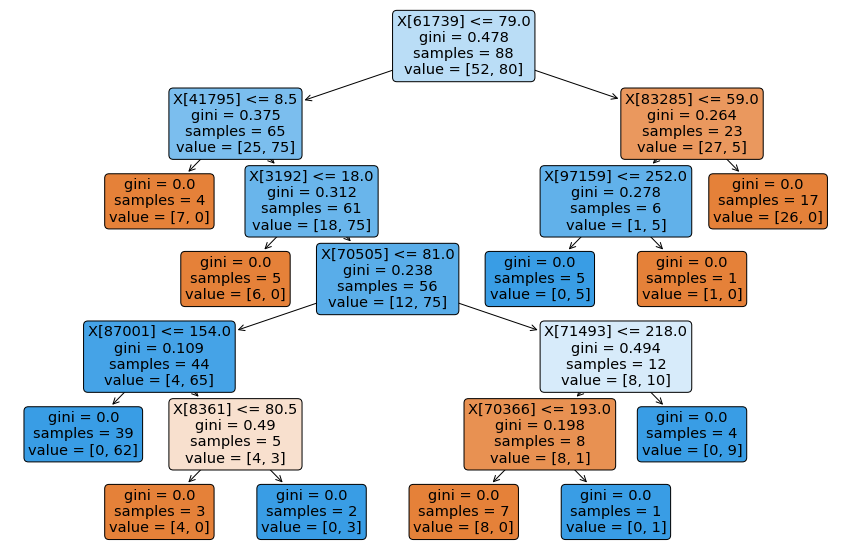

In [17]:
model=RandomForestClassifier()
gamma, log = gammaLogaritmictCorrection(images)

X_train, X_test, y_train, y_test = train_test_split(gamma, filedfnona['gender'])

nsamples, nx, ny, rgb= X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny*rgb))

model.fit(X_train2,y_train)

nsamples, nx, ny, rgb = X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny*rgb))

y_pred=model.predict(x_test2)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
confusion_plot()
score = accuracy_score(y_pred,y_test)
scores.append(score)

fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], 
          #feature_names=X_test,
          #class_names=y_test, 
          filled=True, impurity=True, 
          rounded=True)

              precision    recall  f1-score   support

           0       0.50      0.73      0.59        15
           1       0.83      0.63      0.72        30

    accuracy                           0.67        45
   macro avg       0.66      0.68      0.66        45
weighted avg       0.72      0.67      0.68        45

[[11  4]
 [11 19]]


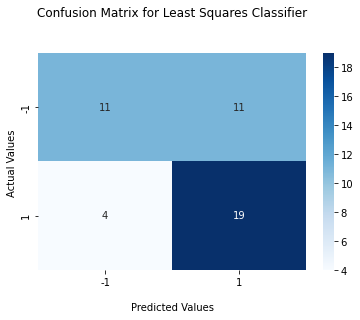

[Text(418.5, 489.24, 'X[64878] <= 226.5\ngini = 0.489\nsamples = 88\nvalue = [56, 76]'),
 Text(209.25, 380.52000000000004, 'X[115411] <= 101.5\ngini = 0.38\nsamples = 59\nvalue = [23, 67]'),
 Text(104.625, 271.8, 'X[31145] <= 59.5\ngini = 0.492\nsamples = 20\nvalue = [18, 14]'),
 Text(52.3125, 163.08000000000004, 'gini = 0.0\nsamples = 6\nvalue = [0, 10]'),
 Text(156.9375, 163.08000000000004, 'X[32840] <= 41.5\ngini = 0.298\nsamples = 14\nvalue = [18, 4]'),
 Text(104.625, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 4]'),
 Text(209.25, 54.360000000000014, 'gini = 0.0\nsamples = 11\nvalue = [18, 0]'),
 Text(313.875, 271.8, 'X[8304] <= 79.5\ngini = 0.158\nsamples = 39\nvalue = [5, 53]'),
 Text(261.5625, 163.08000000000004, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(366.1875, 163.08000000000004, 'X[43799] <= 252.0\ngini = 0.07\nsamples = 36\nvalue = [2, 53]'),
 Text(313.875, 54.360000000000014, 'gini = 0.0\nsamples = 34\nvalue = [0, 53]'),
 Text(418.5, 54.3600000000000

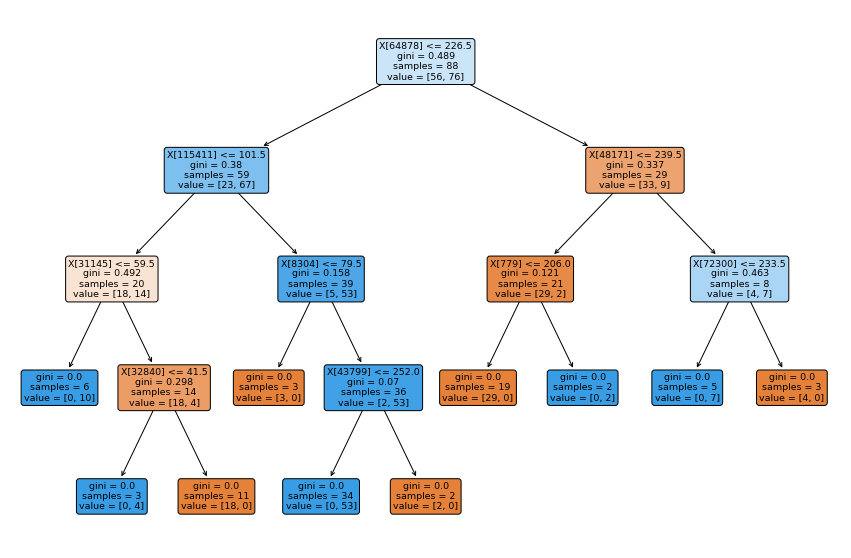

In [18]:
#gamma, log = gammaLogaritmictCorrection(images)
model=RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(log, filedfnona['gender'])

nsamples, nx, ny, rgb= X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny*rgb))

model.fit(X_train2,y_train)

nsamples, nx, ny, rgb = X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny*rgb))

y_pred=model.predict(x_test2)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
confusion_plot()
score = accuracy_score(y_pred,y_test)
scores.append(score)

fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], 
          #feature_names=X_test,
          #class_names=y_test, 
          filled=True, impurity=True, 
          rounded=True)

In [19]:
filters = ['raw', 'Roberts', 'Sobel', 'Intensity', 'Hist Equ.', 'Adapthist', 'gamma', 'log' ]

In [20]:
scores

[0.5777777777777777,
 0.6888888888888889,
 0.7111111111111111,
 0.6444444444444445,
 0.6888888888888889,
 0.7333333333333333,
 0.7111111111111111,
 0.6666666666666666]

In [21]:
len(scores)

8

In [22]:
len(filters)

8

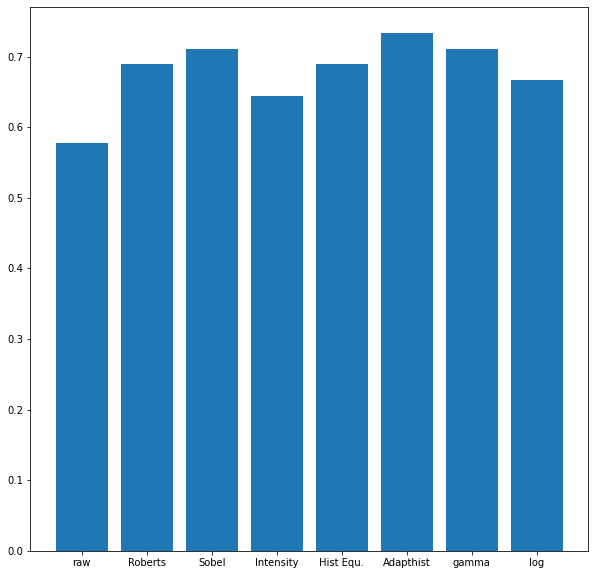

In [23]:
fig = plt.figure(figsize=(10, 10))
fig = plt.bar(x = filters, height = scores)
plt.savefig('filtersRate.png')
plt.show()
